## Import Libraries

In [34]:
import pandas as pd     #Data Analysis and read csv file
import seaborn as sns   #Data Visualization
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression 

import warnings
warnings.filterwarnings("ignore")

## Read Data

In [35]:
df=pd.read_csv("iris_binary_simple.csv")
df.head()

,sepal_length,petal_length,flower_type
0,7.0,4.7,0
1,6.4,4.5,0
2,6.9,4.9,0
3,5.5,4.0,0
4,6.5,4.6,0


## Selecting Features and Target

In [36]:
X=df.drop("flower_type",axis=1)
y=df.flower_type

## Fitting Logistic Regression Model

In [37]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Model Evaluation 

In [38]:
model.score(X,y)

0.91

## Predicting Flower Type

In [39]:
model.predict([[6.5,4.5]])

array([0], dtype=int64)

In [40]:
model.predict_proba([[6.5,4.5]])

array([[0.85050977, 0.14949023]])

## Wrongly Predicted Data

In [41]:
y_pred=model.predict(X)
df["pred_acc"]=abs(df.flower_type-y_pred)
df_wrong=df[df.pred_acc==1]

## Visualizing Data

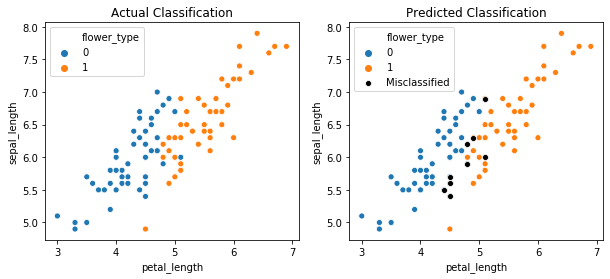

In [44]:
fig,ax=plt.subplots(1,2, figsize=(10,4))
sns.scatterplot(df.petal_length,df.sepal_length,hue=df.flower_type,
                ax=ax[0]).set_title("Actual Classification")
sns.scatterplot(df.petal_length,df.sepal_length,hue=df.flower_type, 
                ax=ax[1]).set_title("Predicted Classification")
sns.scatterplot(df_wrong.petal_length,df_wrong.sepal_length,color='k',
                label="Misclassified", ax=ax[1])
fig.show()